# Aufgabe - Gleichverteilung von Grauwerten

Schreiben Sie eine Funktion, die eine Gleichverteilung von Grauwerten auf einem beliebigen Grauwertbild durchführt. Implementieren Sie hierzu das Verfahren aus der Vorlesung an der mit `#TODO` gekennzeichneten Codestelle.

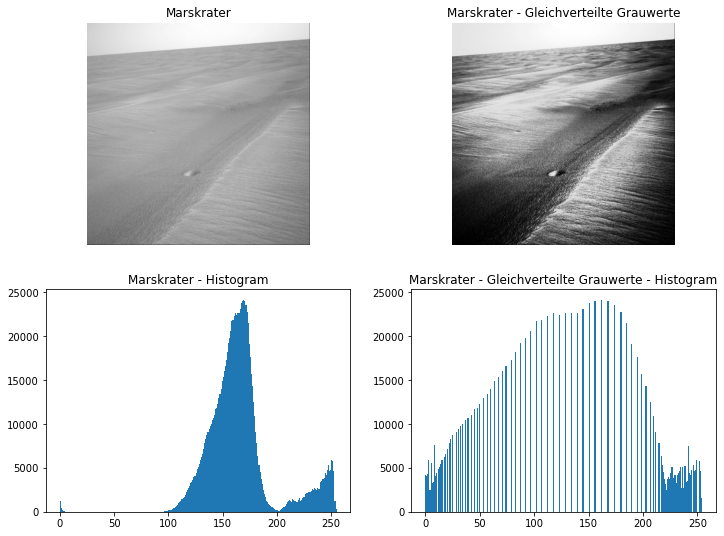

In [2]:
import os

import cv2 as cv
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

#get an histogram of a gray scale image
def getHistogram(img):
    hist = np.zeros(256) 
    for j in range(img.shape[0]):
        for k in range(img.shape[0]):
            hist[img[j,k]] += 1
    return hist

def equal_grayscale_dist(img):  
    imgHist = getHistogram(img)
    #T will describe by which value an old gray value should be overwritten
    T = np.zeros(256)
    #set T values for every gray value
    for grayValue in range(len(T)):    
        #formula from script
        T[grayValue] = int(np.floor(np.divide(255,(np.multiply(img.shape[0],img.shape[1])))*np.sum(imgHist[0:grayValue])))
    result = np.zeros(img.shape, np.uint8)
    #applying T for every pixel
    for j in range(result.shape[0]):
        for k in range(result.shape[1]):
            result[j,k] = T[img[j,k]]
    return result


dir_resources = '../resources'
img = cv.imread(os.path.join(dir_resources, 'Marskrater.jpg'), cv.IMREAD_GRAYSCALE)

fig, axs = plt.subplots(2, 2, figsize=(12, 9))
_ = axs[0,0].imshow(img, cmap='gray')
_ = axs[0,0].set_title('Marskrater')
_ = axs[0,0].axis('off')
_ = axs[0,1].imshow(equal_grayscale_dist(img), cmap='gray')
_ = axs[0,1].set_title('Marskrater - Gleichverteilte Grauwerte')
_ = axs[0,1].axis('off')
#printing the histogram to ensure it worked
_ = axs[1,0].hist(img.ravel() ,bins=255)
_ = axs[1,0].set_title('Marskrater - Histogram')
_ = axs[1,1].set_title('Marskrater - Gleichverteilte Grauwerte - Histogram')
_ = axs[1,1].hist(equal_grayscale_dist(img).ravel(), bins=255)